## Importing the libraries 

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modèles ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

sns.set_theme(style="whitegrid")

## Reading general, manager, and employee data

In [220]:
general = pd.read_csv("data/general_data(1).csv")
manager = pd.read_csv("data/manager_survey_data.csv")
employee = pd.read_csv("data/employee_survey_data.csv")

In [221]:
df = general.merge(manager, on="EmployeeID", how="left")
df = df.merge(employee, on="EmployeeID", how="left")

In [222]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

⏰ Extraction des features temporelles...


/tmp/ipykernel_9754/2871439101.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  out_times_dt = pd.to_datetime(out_times, errors='coerce')
/tmp/ipykernel_9754/2871439101.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  out_times_dt = pd.to_datetime(out_times, errors='coerce')
/tmp/ipykernel_9754/2871439101.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  out_times_dt = pd.to_datetime(out_times, errors='coerce')
/tmp/ipykernel_9754/2871439101.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ens

✅ Features temporelles extraites pour 4410 employés
   Nouvelles colonnes: ['AvgWorkingHours', 'LateArrivals', 'AvgOvertime', 'AbsenceRate', 'WorkHoursVariance']

📊 Aperçu des features temporelles:


,EmployeeID,AvgWorkingHours,LateArrivals,AvgOvertime,AbsenceRate,WorkHoursVariance
0,1,7.37,226,0.00,11.11,0.08
1,2,7.72,231,0.16,9.58,0.10
2,3,7.01,237,0.00,7.28,0.10
3,4,7.19,223,0.00,9.96,0.08
4,5,8.01,239,0.27,6.13,0.09



📈 Statistiques des features temporelles:


,EmployeeID,AvgWorkingHours,LateArrivals,AvgOvertime,AbsenceRate,WorkHoursVariance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,7.700830,230.568254,0.480066,9.476744,0.089535
std,1273.201673,1.340277,5.860168,0.810511,2.108358,0.008672
min,1.000000,5.950000,212.000000,0.000000,4.980000,0.060000
25%,1103.250000,6.670000,226.000000,0.000000,7.660000,0.080000
50%,2205.500000,7.410000,231.000000,0.120000,9.580000,0.090000
75%,3307.750000,8.370000,235.000000,0.430000,11.110000,0.100000
max,4410.000000,11.030000,246.000000,3.030000,13.790000,0.120000



🔄 Avant merge: 4410 lignes, 29 colonnes
✅ Après merge: 4410 lignes, 34 colonnes

🔍 Valeurs manquantes dans les nouvelles features:
   AvgWorkingHours: 0 valeurs manquantes
   LateArrivals: 0 valeurs manquantes
   AvgOvertime: 0 valeurs manquantes
   AbsenceRate: 0 valeurs manquantes
   WorkHoursVariance: 0 valeurs manquantes


/tmp/ipykernel_9754/2871439101.py:154: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/demy/.local/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


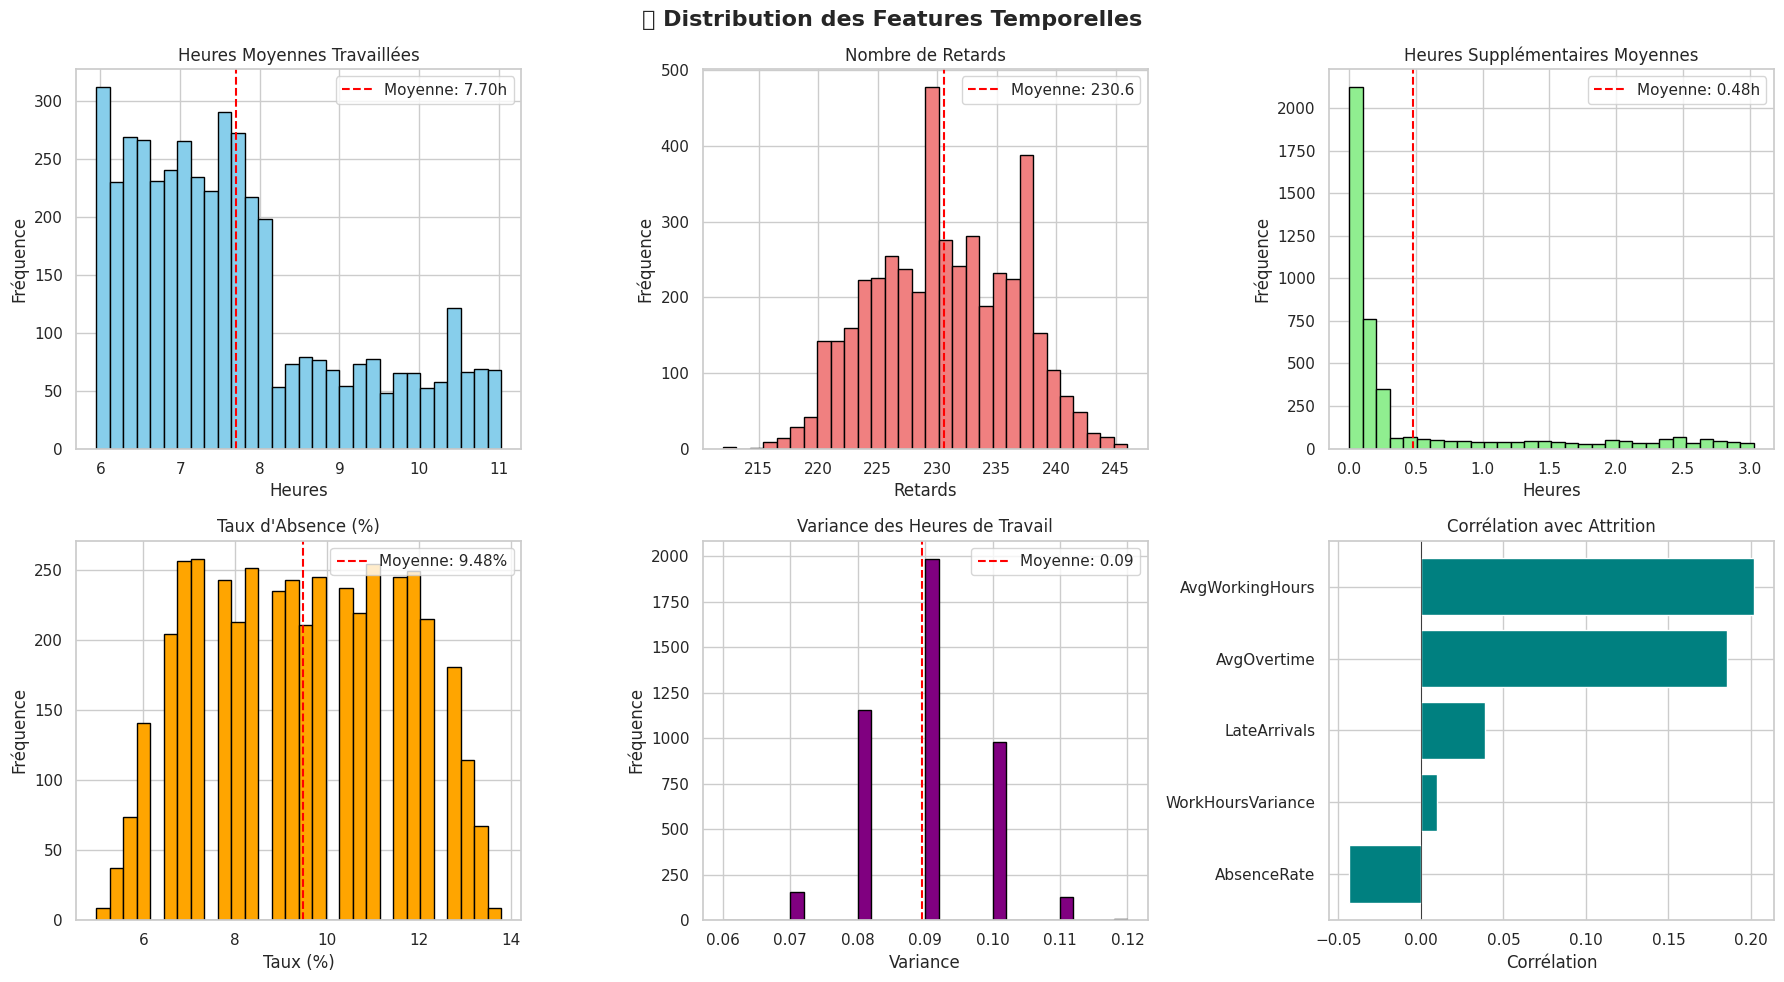


📊 Comparaison des features temporelles par statut d'attrition:

AvgWorkingHours:
   Employés restants: 7.58
   Employés partis:   8.32
   Différence:        +0.74

LateArrivals:
   Employés restants: 230.47
   Employés partis:   231.08
   Différence:        +0.62

AvgOvertime:
   Employés restants: 0.41
   Employés partis:   0.82
   Différence:        +0.41

AbsenceRate:
   Employés restants: 9.52
   Employés partis:   9.27
   Différence:        -0.25

WorkHoursVariance:
   Employés restants: 0.09
   Employés partis:   0.09
   Différence:        +0.00

✅ Features temporelles intégrées avec succès!
   Le DataFrame contient maintenant 34 colonnes


In [224]:
# =========================================================
# Extraction des Features Temporelles
# =========================================================

import numpy as np

def extract_time_features():
    """Extrait les features temporelles depuis in_time.csv et out_time.csv"""
    print("⏰ Extraction des features temporelles...")
    
    # Charger les données temporelles
    in_time = pd.read_csv("data/in_time.csv")
    out_time = pd.read_csv("data/out_time.csv")
    
    # Identifier la colonne EmployeeID (première colonne)
    employee_id_col = in_time.columns[0]
    
    # Extraire les colonnes de dates (toutes sauf la première)
    date_columns = in_time.columns[1:]
    
    time_features = []
    
    for idx, row in in_time.iterrows():
        employee_id = row[employee_id_col]
        
        # Récupérer les heures d'arrivée et de départ
        in_times = row[date_columns]
        out_times = out_time.iloc[idx][date_columns]
        
        # Convertir en datetime
        in_times_dt = pd.to_datetime(in_times, errors='coerce')
        out_times_dt = pd.to_datetime(out_times, errors='coerce')
        
        # Calculer les heures de travail pour chaque jour
        working_hours = []
        late_count = 0
        overtime_hours = []
        
        for in_t, out_t in zip(in_times_dt, out_times_dt):
            if pd.notna(in_t) and pd.notna(out_t):
                # Heures travaillées
                hours = (out_t - in_t).total_seconds() / 3600
                working_hours.append(hours)
                
                # Retards (arrivée après 9h00)
                if in_t.hour >= 9 and in_t.minute > 0:
                    late_count += 1
                
                # Heures supplémentaires (plus de 8h)
                if hours > 8:
                    overtime_hours.append(hours - 8)
        
        # Calculer les features
        avg_working_hours = np.mean(working_hours) if working_hours else 8.0
        avg_overtime = np.mean(overtime_hours) if overtime_hours else 0.0
        absence_rate = (len(date_columns) - len(working_hours)) / len(date_columns) * 100
        work_hours_variance = np.var(working_hours) if len(working_hours) > 1 else 0.0
        
        time_features.append({
            'EmployeeID': employee_id,
            'AvgWorkingHours': round(avg_working_hours, 2),
            'LateArrivals': late_count,
            'AvgOvertime': round(avg_overtime, 2),
            'AbsenceRate': round(absence_rate, 2),
            'WorkHoursVariance': round(work_hours_variance, 2)
        })
    
    time_df = pd.DataFrame(time_features)
    print(f"✅ Features temporelles extraites pour {len(time_df)} employés")
    print(f"   Nouvelles colonnes: {list(time_df.columns[1:])}")
    
    return time_df

# Extraire les features temporelles
time_features = extract_time_features()

# Afficher les premières lignes
print("\n📊 Aperçu des features temporelles:")
display(time_features.head())

# Statistiques descriptives
print("\n📈 Statistiques des features temporelles:")
display(time_features.describe())

# Merger avec le DataFrame principal
print(f"\n🔄 Avant merge: {df.shape[0]} lignes, {df.shape[1]} colonnes")
df = df.merge(time_features, on="EmployeeID", how="left")
print(f"✅ Après merge: {df.shape[0]} lignes, {df.shape[1]} colonnes")

# Vérifier qu'il n'y a pas de valeurs manquantes
print("\n🔍 Valeurs manquantes dans les nouvelles features:")
new_features = ['AvgWorkingHours', 'LateArrivals', 'AvgOvertime', 'AbsenceRate', 'WorkHoursVariance']
for feature in new_features:
    missing = df[feature].isnull().sum()
    print(f"   {feature}: {missing} valeurs manquantes")

# Convertir Attrition en numérique pour les calculs (FIX)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# =========================================================
# Visualisations des Features Temporelles
# =========================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Distribution des Features Temporelles', fontsize=16, fontweight='bold')

# 1. AvgWorkingHours
axes[0, 0].hist(df['AvgWorkingHours'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Heures Moyennes Travaillées')
axes[0, 0].set_xlabel('Heures')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df['AvgWorkingHours'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["AvgWorkingHours"].mean():.2f}h')
axes[0, 0].legend()

# 2. LateArrivals
axes[0, 1].hist(df['LateArrivals'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Nombre de Retards')
axes[0, 1].set_xlabel('Retards')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].axvline(df['LateArrivals'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["LateArrivals"].mean():.1f}')
axes[0, 1].legend()

# 3. AvgOvertime
axes[0, 2].hist(df['AvgOvertime'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Heures Supplémentaires Moyennes')
axes[0, 2].set_xlabel('Heures')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].axvline(df['AvgOvertime'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["AvgOvertime"].mean():.2f}h')
axes[0, 2].legend()

# 4. AbsenceRate
axes[1, 0].hist(df['AbsenceRate'], bins=30, color='orange', edgecolor='black')
axes[1, 0].set_title('Taux d\'Absence (%)')
axes[1, 0].set_xlabel('Taux (%)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].axvline(df['AbsenceRate'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["AbsenceRate"].mean():.2f}%')
axes[1, 0].legend()

# 5. WorkHoursVariance
axes[1, 1].hist(df['WorkHoursVariance'], bins=30, color='purple', edgecolor='black')
axes[1, 1].set_title('Variance des Heures de Travail')
axes[1, 1].set_xlabel('Variance')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].axvline(df['WorkHoursVariance'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["WorkHoursVariance"].mean():.2f}')
axes[1, 1].legend()

# 6. Corrélation avec Attrition
attrition_corr = df[new_features + ['Attrition']].corr()['Attrition'].drop('Attrition').sort_values()
axes[1, 2].barh(attrition_corr.index, attrition_corr.values, color='teal')
axes[1, 2].set_title('Corrélation avec Attrition')
axes[1, 2].set_xlabel('Corrélation')
axes[1, 2].axvline(0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# =========================================================
# Analyse de l'Impact sur l'Attrition
# =========================================================

print("\n📊 Comparaison des features temporelles par statut d'attrition:")
print("="*70)

for feature in new_features:
    print(f"\n{feature}:")
    print(f"   Employés restants: {df[df['Attrition']==0][feature].mean():.2f}")
    print(f"   Employés partis:   {df[df['Attrition']==1][feature].mean():.2f}")
    diff = df[df['Attrition']==1][feature].mean() - df[df['Attrition']==0][feature].mean()
    print(f"   Différence:        {diff:+.2f}")

print("\n✅ Features temporelles intégrées avec succès!")
print(f"   Le DataFrame contient maintenant {df.shape[1]} colonnes")

## Inspecting before cleaning the data 

In [225]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours,LateArrivals,AvgOvertime,AbsenceRate,WorkHoursVariance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,3,3,3.0,4.0,2.0,7.37,226,0.00,11.11,0.08
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,2,4,3.0,2.0,4.0,7.72,231,0.16,9.58,0.10
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,3,3,2.0,2.0,1.0,7.01,237,0.00,7.28,0.10
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,2,3,4.0,4.0,3.0,7.19,223,0.00,9.96,0.08
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,3,3,4.0,1.0,3.0,8.01,239,0.27,6.13,0.09


## Indetidentifying numerical and catogorical data

In [226]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

print("The number of columns is:", len(num_cols))

num_cols.value_counts()


The number of columns is: 27


Age                        1
Attrition                  1
DistanceFromHome           1
Education                  1
EmployeeCount              1
EmployeeID                 1
JobLevel                   1
MonthlyIncome              1
NumCompaniesWorked         1
PercentSalaryHike          1
StandardHours              1
StockOptionLevel           1
TotalWorkingYears          1
TrainingTimesLastYear      1
YearsAtCompany             1
YearsSinceLastPromotion    1
YearsWithCurrManager       1
JobInvolvement             1
PerformanceRating          1
EnvironmentSatisfaction    1
JobSatisfaction            1
WorkLifeBalance            1
AvgWorkingHours            1
LateArrivals               1
AvgOvertime                1
AbsenceRate                1
WorkHoursVariance          1
Name: count, dtype: int64

In [227]:
obj_cols = df.select_dtypes(include=['object']).columns

print("The number of object columns is:",len(obj_cols))

obj_cols.value_counts()

The number of object columns is: 7


BusinessTravel    1
Department        1
EducationField    1
Gender            1
JobRole           1
MaritalStatus     1
Over18            1
Name: count, dtype: int64

## Checking and filling missing data 

In [228]:
print("Missing values before filling:")
print(df[num_cols].isnull().sum())

Missing values before filling:
Age                         0
Attrition                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeID                  0
JobLevel                    0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
AvgWorkingHours             0
LateArrivals                0
AvgOvertime                 0
AbsenceRate                 0
WorkHoursVariance           0
dtype: int64


In [229]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("Missing values after filling:")
print(df[num_cols].isnull().sum())

Missing values after filling:
Age                        0
Attrition                  0
DistanceFromHome           0
Education                  0
EmployeeCount              0
EmployeeID                 0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
AvgWorkingHours            0
LateArrivals               0
AvgOvertime                0
AbsenceRate                0
WorkHoursVariance          0
dtype: int64


In [230]:
print("Missing values before filling:")
print(df[obj_cols].isnull().sum())

Missing values before filling:
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
Over18            0
dtype: int64


In [231]:
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("Missing values after filling:")
print(df[cat_cols].isnull().sum())

Missing values after filling:
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
Over18            0
dtype: int64


## Removing useless columns

In [232]:
df = df.drop(["Over18","StandardHours", "EmployeeCount"], axis=1)

In [233]:
print(df.isna().sum())      # MUST be all zeros
print(df.info())            # Attrition must be int64, useless columns removed
df.head()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
AvgWorkingHours            0
LateArrivals               0
AvgOvertime                0
AbsenceRate                0
WorkHoursVariance          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours,LateArrivals,AvgOvertime,AbsenceRate,WorkHoursVariance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,3,3,3.0,4.0,2.0,7.37,226,0.00,11.11,0.08
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,2,4,3.0,2.0,4.0,7.72,231,0.16,9.58,0.10
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,3,3,2.0,2.0,1.0,7.01,237,0.00,7.28,0.10
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,2,3,4.0,4.0,3.0,7.19,223,0.00,9.96,0.08
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,3,3,4.0,1.0,3.0,8.01,239,0.27,6.13,0.09


## Saving the cleaned data 

In [234]:
os.makedirs("clean_data", exist_ok=True)

df.to_csv("clean_data/clean_data.csv", index=False)

print("Cleaned dataset saved successfully as clean_data/clean_data.csv")

Cleaned dataset saved successfully as clean_data/clean_data.csv


## Reading the cleaned dataset and saving it to memeory 

In [235]:
df = pd.read_csv("clean_data/clean_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours,LateArrivals,AvgOvertime,AbsenceRate,WorkHoursVariance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,3,3,3.0,4.0,2.0,7.37,226,0.00,11.11,0.08
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,2,4,3.0,2.0,4.0,7.72,231,0.16,9.58,0.10
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,3,3,2.0,2.0,1.0,7.01,237,0.00,7.28,0.10
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,2,3,4.0,4.0,3.0,7.19,223,0.00,9.96,0.08
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,3,3,4.0,1.0,3.0,8.01,239,0.27,6.13,0.09


## Exploratory Data Analysis

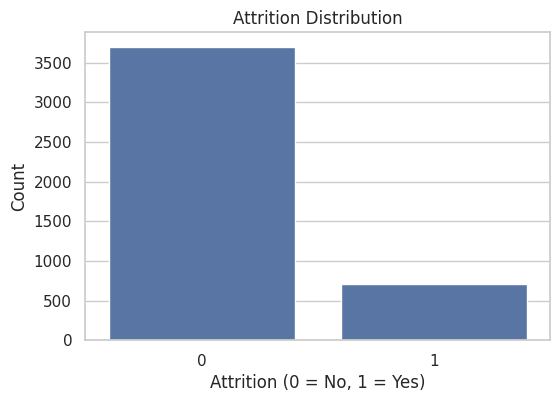

In [236]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Attrition"])
plt.title("Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

We can clearly see that most employee haven't quit the company which might cause problem in the machine learning training. 

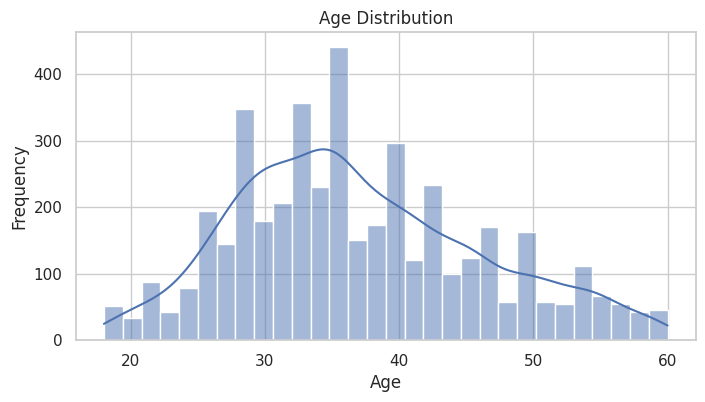

In [237]:
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


The age distribution of employees falls between 20 and 60 years old, with a peak around 30 years old and 40 years old. 

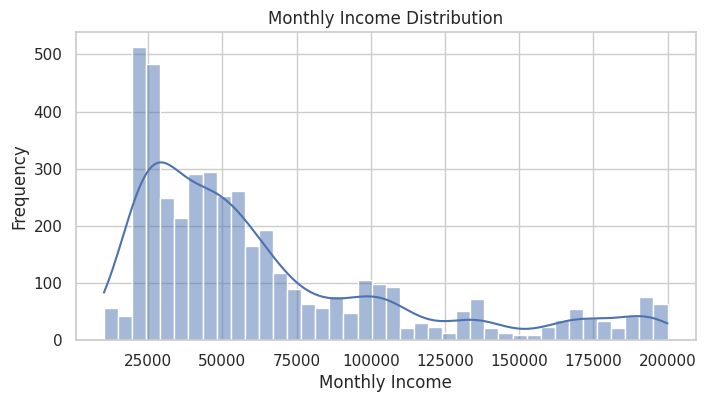

In [238]:
plt.figure(figsize=(8,4))
sns.histplot(df["MonthlyIncome"], kde=True, bins=40)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()


Income is right-skewed, meaning most employees earn on the lower-middle range. This can help analyze if salary impacts attrition.


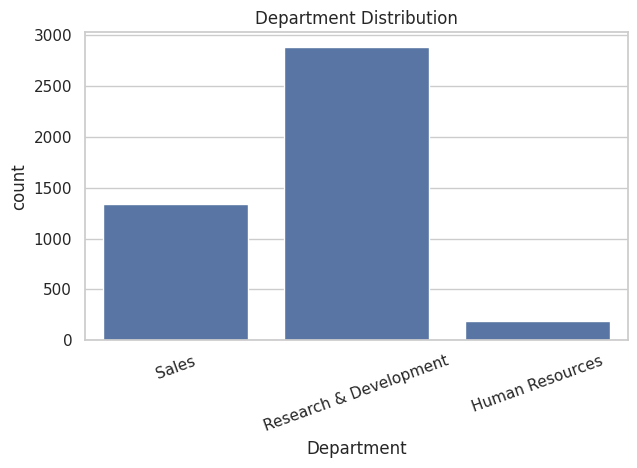

In [239]:
plt.figure(figsize=(7,4))
sns.countplot(x=df["Department"])
plt.title("Department Distribution")
plt.xticks(rotation=20)
plt.show()


The company employs around 3000 reasearch & development employees, around 300 human resources and around 1500 sales employees, which suggests the sector is technology.

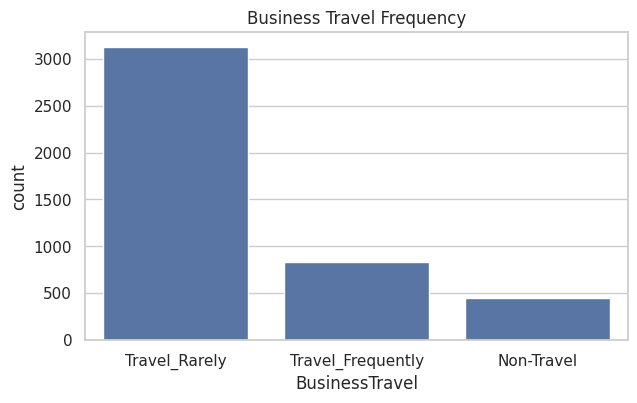

In [240]:
plt.figure(figsize=(7,4))
sns.countplot(x=df["BusinessTravel"])
plt.title("Business Travel Frequency")
plt.show()


Most workers Travel_Rarely and a tiny bit of them do not travel. 

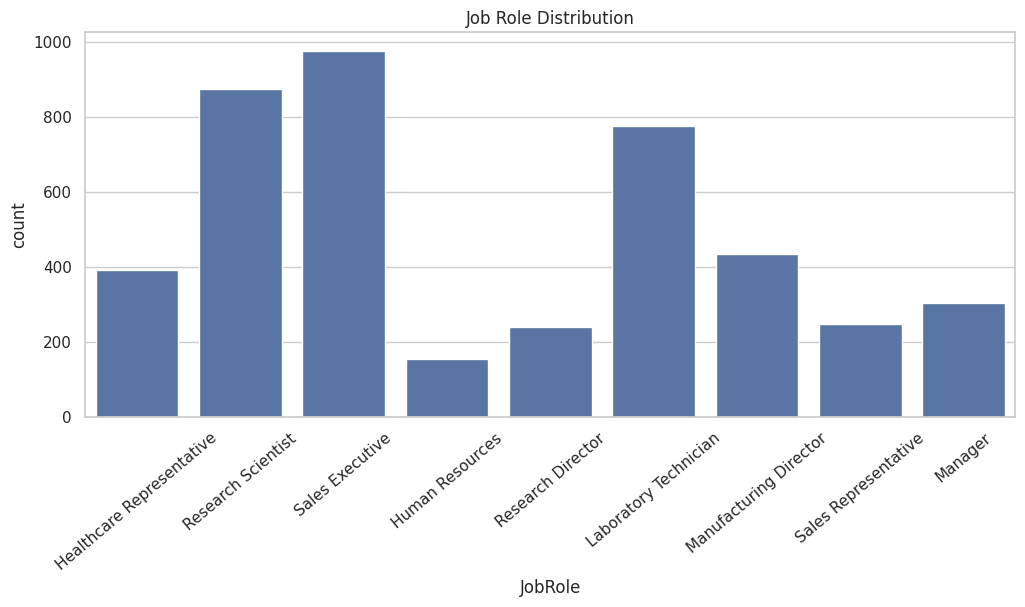

In [241]:
plt.figure(figsize=(12,5))
sns.countplot(x=df["JobRole"])
plt.title("Job Role Distribution")
plt.xticks(rotation=40)
plt.show()


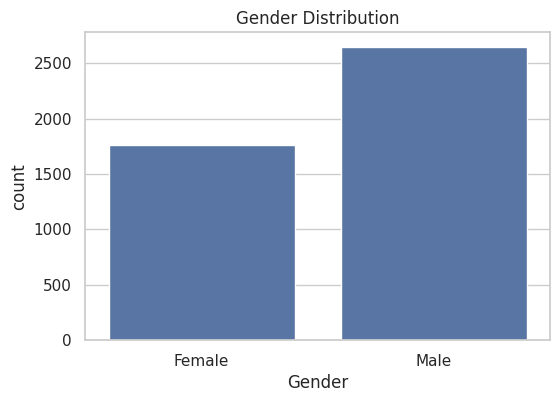

In [242]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Gender"])
plt.title("Gender Distribution")
plt.show()


The company employs more men than women.

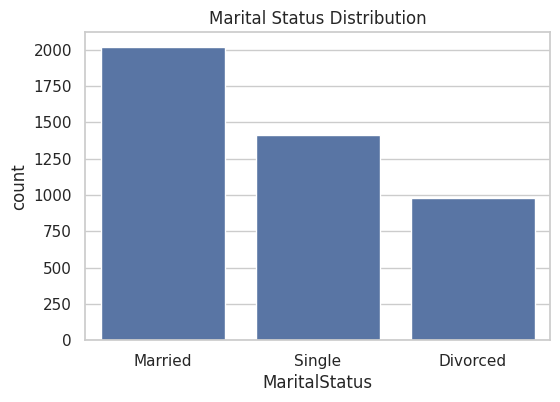

In [243]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["MaritalStatus"])
plt.title("Marital Status Distribution")
plt.show()


## Correlation card

<Axes: >

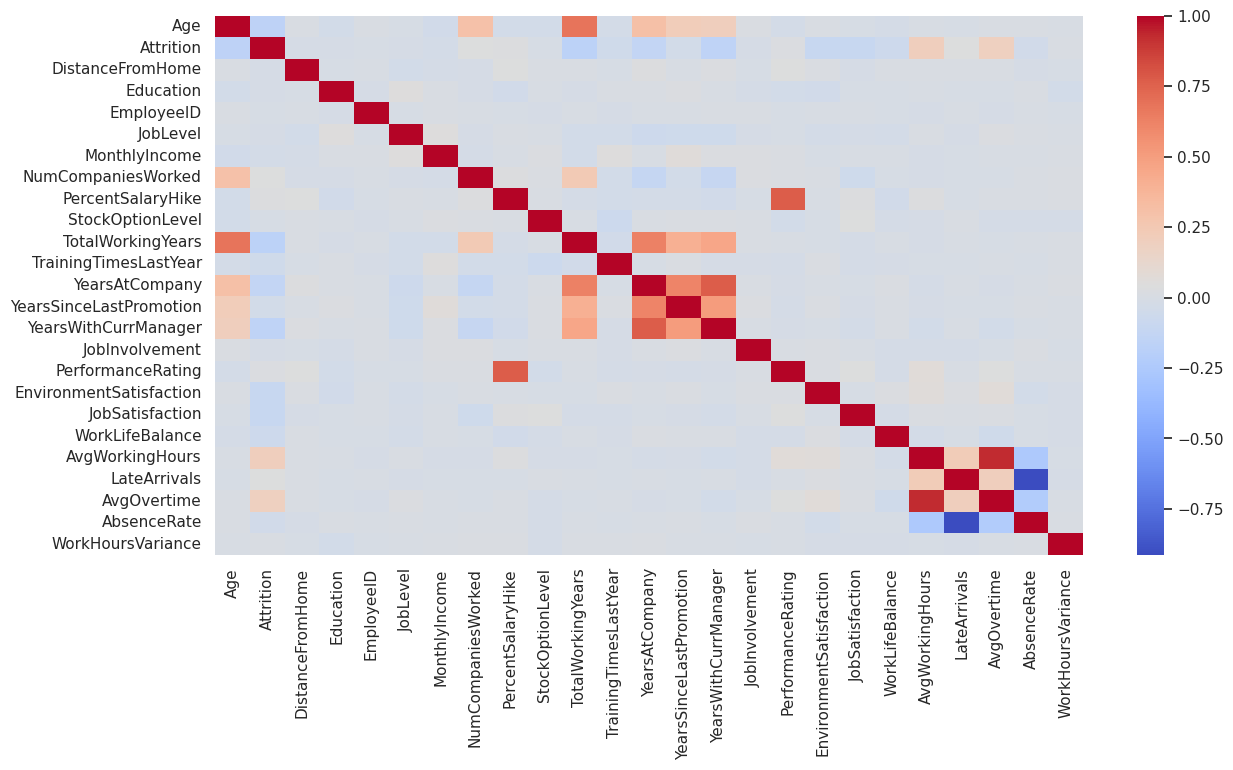

In [244]:
plt.figure(figsize=(14,7))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")

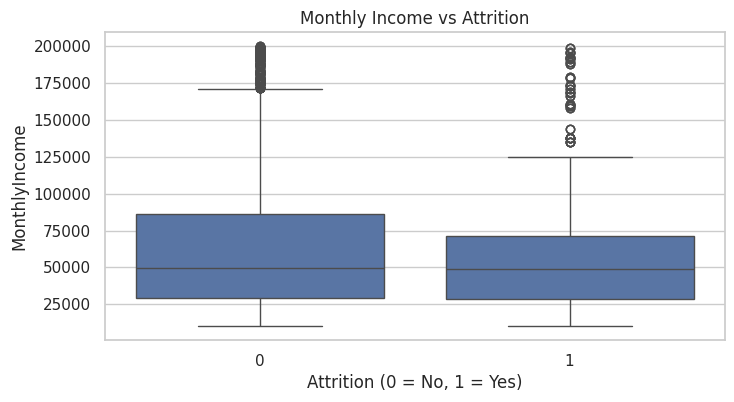

In [245]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"])
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.show()

Employees who left the company (Attrition = 1) may show different income distributions.  
Boxplots help detect patterns such as low salary → higher attrition.


## Boxplot: YearsAtCompany vs Attrition

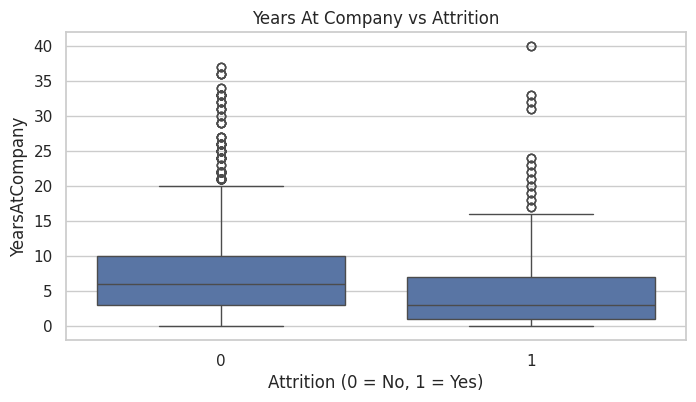

In [246]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"])
plt.title("Years At Company vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.show()


Employees with fewer years at the company tend to be more likely to leave early.  
Ceci est a typical HR pattern, showing early turnover risk.


## Preparing the data for machine learning 

We need two variables one named X for the features and one named y for the target variable which is this context Attrition. 

In [247]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

Next we split the data into train and test sets

In [248]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

Checking once again for categorical columns

In [249]:
categorical_cols = X.select_dtypes(include="object").columns

categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

Applying one-hot encoding to the object columns

In [250]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)


In [251]:
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [252]:
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

Checking if numerical conversion is correct :

In [253]:
X_train_encoded.dtypes.value_counts()

int64    44
Name: count, dtype: int64

In [254]:
X_train_encoded.head()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
3465,41,1,4,3466,1,52570,1,14,0,10,...,0,0,0,0,1,0,0,0,1,0
3485,34,1,1,3486,2,26960,3,23,0,6,...,0,0,0,0,1,0,0,0,1,0
3052,21,10,2,3053,1,53730,1,12,1,1,...,0,1,0,0,0,0,0,0,0,1
2012,28,7,3,2013,2,29760,1,14,0,1,...,0,0,1,0,0,0,0,0,0,0
426,40,1,4,427,2,192320,2,14,1,11,...,0,0,0,0,0,1,0,0,0,0


In [255]:
X_test_encoded.head()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
3331,53,1,1,3332,1,44250,6,22,1,33,...,0,0,0,0,0,0,1,0,0,1
2050,42,2,4,2051,1,22850,0,16,0,22,...,0,1,0,0,0,0,0,0,0,1
1213,49,1,4,1214,2,58100,1,21,1,10,...,0,0,0,1,0,0,0,0,1,0
2355,45,2,4,2356,2,58550,1,14,1,10,...,0,0,0,1,0,0,0,0,1,0
2433,45,2,3,2434,2,83960,3,15,2,25,...,0,0,0,1,0,0,0,0,1,0


We must Scale the data for distance based models to avoid bias : 

In [256]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)


In [257]:
X_test_scaled = scaler.transform(X_test_encoded)


## Applying SMOTE

We apply the smote technique to balance the dataset to avoid overfitting. 

In [258]:
from imblearn.over_sampling import SMOTE

In [259]:
smote = SMOTE(random_state=42)


In [260]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Scaled models - class distribution after SMOTE:")
print(np.bincount(y_train_resampled))

Scaled models - class distribution after SMOTE:
[2959 2959]


In [261]:
print("Test set class distribution:")
print(np.bincount(y_test))

Test set class distribution:
[740 142]


## Training the models 

| Model               | Training features      | Target                 | Test features    |
| ------------------- | ---------------------- | ---------------------- | ---------------- |
| KNN                 | `X_train_resampled`    | `y_train_resampled`    | `X_test_scaled`  |
| Logistic Regression | `X_train_resampled`    | `y_train_resampled`    | `X_test_scaled`  |
| SVM                 | `X_train_resampled`    | `y_train_resampled`    | `X_test_scaled`  |
| Decision Tree       | `X_train_rf_resampled` | `y_train_rf_resampled` | `X_test_encoded` |
| Random Forest       | `X_train_rf_resampled` | `y_train_rf_resampled` | `X_test_encoded` |


In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## First Model KNN : 

K-Nearest Neighbors $KNN$ is a supervised algorithm. We have a dataset  $\mathcal{D} = {(x_1, y_1), ..., (x_n, y_n)}$  with feature vectors  $x_i \in \mathbb{R}^d$ and labels $y_i$. 

To predict a new point $x$ , we must compute distances to all training points. 

Common distance: Euclidean $d(x, x_i) = \sqrt{\sum_{j=1}^d (x_j - x_{ij})^2}$ . 

For shorter distances, we pick the K smallest. 

For classification, we must take the majority label among neighbors:  $\hat{y} = \text{mode}{y_{i_1}, ..., y_{i_K}}$. 

Optionally, weight by distance: $w_i = 1/d(x, x_i)$ and $\hat{y} = \arg\max_c \sum_i w_i \mathbf{1}(y_i = c)$. For regression, average neighbor values: $\hat{y} = \frac{1}{K} \sum_i y_i$ or weighted: $\hat{y} = \frac{\sum_i w_i y_i}{\sum_i w_i}$. 

Choosing $K$ small for sensitivity, large for smoothness.


In [263]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Performance:
Accuracy: 0.8321995464852607
Confusion Matrix:
 [[593 147]
 [  1 141]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       740
           1       0.49      0.99      0.66       142

    accuracy                           0.83       882
   macro avg       0.74      0.90      0.77       882
weighted avg       0.92      0.83      0.85       882



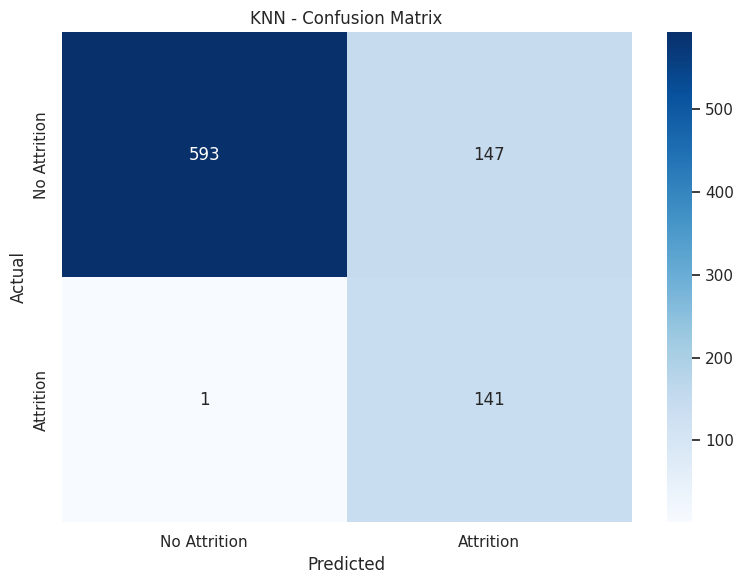

In [264]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
# Usage
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

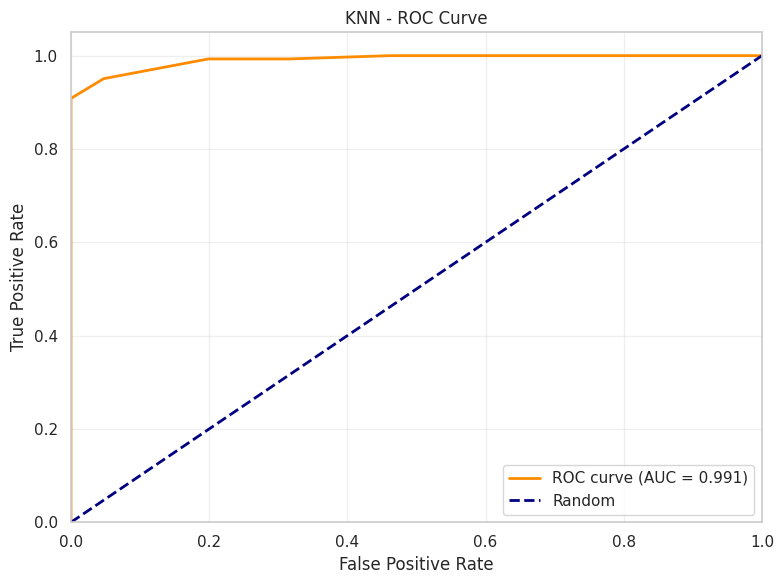

In [265]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba, 'KNN')

## Second Model Logistic regression 

Logistic Regression is a supervised learning algorithm used primarily for binary classification. Given a dataset $\mathcal{D} = \{(x_1, y_1), ..., (x_n, y_n)\}$ where $x_i \in \mathbb{R}^d$ are feature vectors and $y_i \in \{0, 1\}$ are categorical labels, the model estimates the probability that a given input belongs to a specific class.

Unlike linear regression, which predicts continuous values, logistic regression applies the **Sigmoid (logistic) function** to a linear combination of features to map any real-valued number into the range $(0, 1)$:
$$P(y=1|x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$
where $w \in \mathbb{R}^d$ is the weight vector and $b$ is the bias term.

To predict a discrete label $\hat{y}$, we apply a threshold (commonly $0.5$) to the computed probability:
$$\hat{y} = 
\begin{cases} 
1 & \text{if } \sigma(w^T x + b) \geq 0.5 \\
0 & \text{if } \sigma(w^T x + b) < 0.5 
\end{cases}$$
Geometrically, the equation $w^T x + b = 0$ defines the **decision boundary**, which is a linear hyperplane in the feature space.

To find the optimal $w$ and $b$, we minimize the **Binary Cross-Entropy (Log Loss)** function, which penalizes confident wrong predictions:
$$J(w, b) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i) \right]$$
where $\hat{p}_i = \sigma(w^T x_i + b)$. Because this function is convex, we typically use **Gradient Descent** to find the global minimum.

To prevent overfitting, especially in high-dimensional spaces, regularization terms can be added to the loss function:
*   **L2 Regularization (Ridge):** Adds $\lambda \sum j w_j^2$ to $J(w, b)$.
*   **L1 Regularization (Lasso):** Adds $\lambda \sum j |w_j|$, which can drive some weights to zero for feature selection.

For problems with more than two classes ($y \in \{1, ..., K\}$), Logistic Regression uses the **Softmax function** (Multinomial Logistic Regression):
$$P(y=k|x) = \frac{e^{w_k^T x + b_k}}{\sum_{j=1}^K e^{w_j^T x + b_j}}$$
This ensures the sum of probabilities across all possible classes equals 1.

In [266]:
#Initialize Logistic Regression
lgr = LogisticRegression()

#Train (Ensure X_train_resampled was scaled the same way as X_test_scaled!)
lgr.fit(X_train_resampled, y_train_resampled)

#Predict on test set
y_pred = lgr.predict(X_test_scaled)

#Evaluate
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.7607709750566893
Confusion Matrix:
 [[569 171]
 [ 40 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       740
           1       0.37      0.72      0.49       142

    accuracy                           0.76       882
   macro avg       0.65      0.74      0.67       882
weighted avg       0.84      0.76      0.79       882



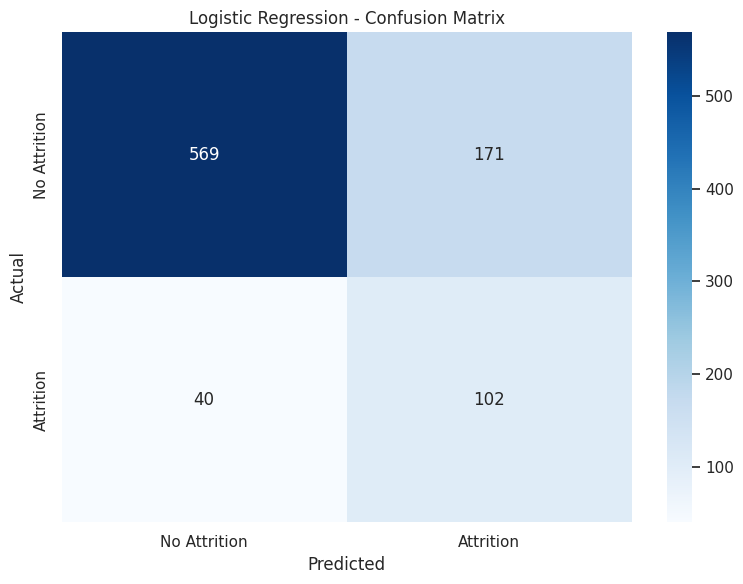

In [267]:
def plot_lgr_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    
    plt.title('Logistic Regression - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()


plot_lgr_confusion_matrix(y_test, y_pred)

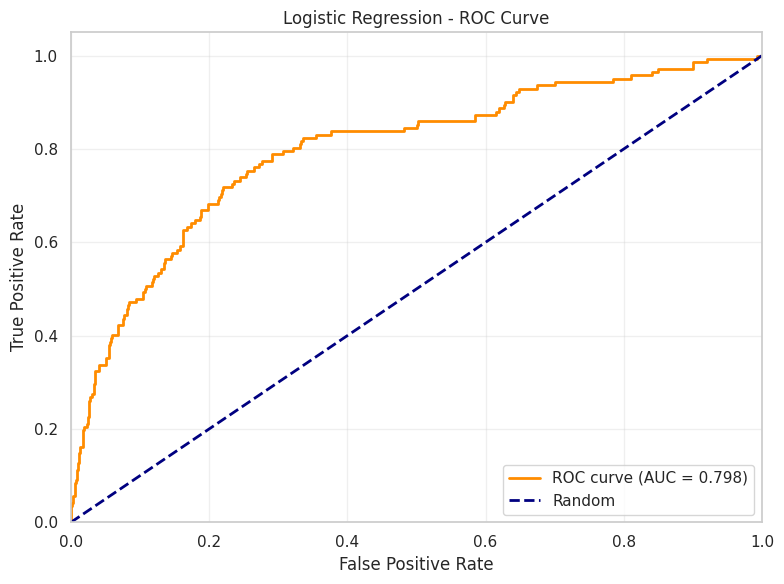

In [268]:
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

y_pred_proba_lgr = lgr.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba_lgr, 'Logistic Regression')

## Third Model SVM : 

Support Vector Machine (SVM) is a supervised learning algorithm used primarily for classification and, less commonly, regression. Given a dataset 
$\mathcal{D} = \{(x_1, y_1), ..., (x_n, y_n)\}$
where 
$x_i \in \mathbb{R}^d$ 
are feature vectors and 
$y_i \in \{-1, 1\}$
are class labels, SVM aims to find the optimal hyperplane that separates the classes with the **maximum margin**.

The linear decision boundary can be expressed as: 
$w^T x + b = 0$
where 
$w \in \mathbb{R}^d$
is the weight vector and 
$b$
is the bias term. Points that lie on the margin satisfy: 
$w^T x + b = \pm 1$

The margin, which is the distance between the hyperplane and the closest data points (support vectors), is given by: 
$\text{Margin} = \frac{2}{\|w\|}$
Maximizing the margin is equivalent to minimizing 
$\frac{1}{2} \|w\|^2$
subject to the constraint that all points are correctly classified: 
$y_i (w^T x_i + b) \geq 1, \quad \forall i$

For non-linearly separable data, **Slack variables** 
$\xi_i \geq 0$ 
are introduced to allow some misclassification, resulting in the **soft-margin SVM** optimization problem: 
$\min_{w,b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i$
subject to 
$y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$
where 
$C$
controls the trade-off between maximizing the margin and minimizing classification error.

For non-linear decision boundaries, the **kernel trick** is used to map data into a higher-dimensional space without explicitly computing the transformation. Common kernels include:
* **Linear kernel:** 
$K(x_i, x_j) = x_i^T x_j$
* **Polynomial kernel:** 
$K(x_i, x_j) = (x_i^T x_j + 1)^d$
* **Radial Basis Function (RBF / Gaussian) kernel:** 
$K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)$
* **Sigmoid kernel:** 
$K(x_i, x_j) = \tanh(\alpha x_i^T x_j + r)$

For multi-class classification ($y \in \{1, ..., K\}$), SVM typically uses **one-vs-one** or **one-vs-rest** strategies to combine multiple binary classifiers into a single multi-class model.


In [269]:
#Initialize SVC
svm_model = SVC(kernel='rbf', C=1.0, probability=True)

#Train
svm_model.fit(X_train_resampled, y_train_resampled)

#Predict
y_pred_svm = svm_model.predict(X_test_scaled)

#Evaluate
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM Performance:
Accuracy: 0.7607709750566893
Confusion Matrix:
 [[569 171]
 [ 40 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       740
           1       0.37      0.72      0.49       142

    accuracy                           0.76       882
   macro avg       0.65      0.74      0.67       882
weighted avg       0.84      0.76      0.79       882



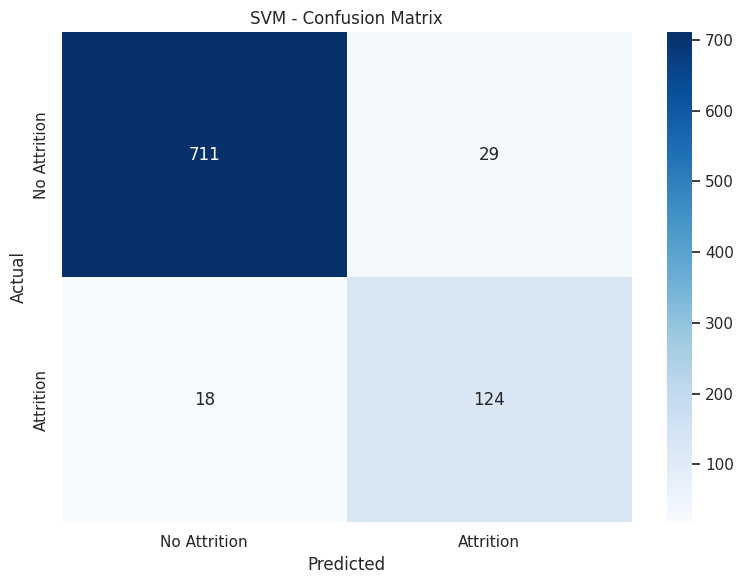

In [270]:
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

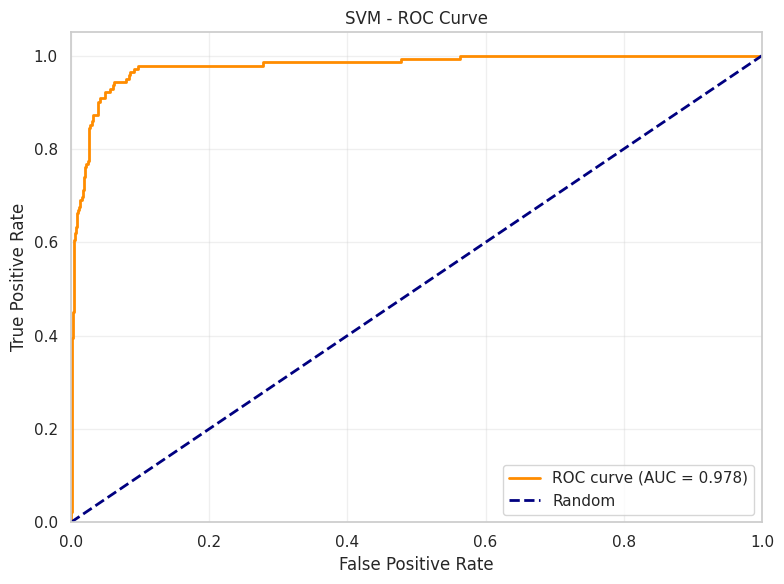

In [271]:
# Get probabilities (requires probability=True during initialization)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Use the ROC function
plot_roc_curve(y_test, y_pred_proba_svm, 'SVM')

  

## Fourth model decision tree

Decision Tree (DT) is a supervised learning algorithm used for classification and regression. Given a dataset  
$\mathcal{D} = \{(x_1, y_1), ..., (x_n, y_n)\}$  
where  
$x_i \in \mathbb{R}^d$  
are feature vectors and  
$y_i$  
are labels, Decision Tree aims to learn a hierarchical model that splits the feature space into regions with mostly homogeneous labels.

Each internal node represents a **decision on a feature** $x_j$ using a threshold $t$:  
$x_j \leq t$  

A split divides the dataset into two subsets:  
* **Left child:** all points satisfying $x_j \leq t$  
* **Right child:** all points satisfying $x_j > t$  

The choice of feature $x_j$ and threshold $t$ is determined by maximizing a **purity measure**. Common measures include:  
* **Gini impurity:**  
$\text{Gini}(S) = 1 - \sum_{c} p_c^2$  
where $p_c$ is the proportion of class $c$ in subset $S$.  
* **Entropy:**  
$\text{Entropy}(S) = - \sum_{c} p_c \log_2 p_c$  
* **Variance** (for regression):  
$\text{Var}(S) = \frac{1}{|S|} \sum_{i \in S} (y_i - \bar{y})^2$

The tree is grown recursively: at each node, select the feature and threshold that **minimizes the impurity** in the resulting child nodes. Recursion stops when a stopping criterion is met, such as:  
* All points in the node have the same label  
* Maximum tree depth is reached  
* Minimum number of samples per leaf

The prediction for a new point $x$ is obtained by **traversing the tree** from the root to a leaf, following the decisions $x_j \leq t$, and assigning the label of the leaf node:  
* For classification: **majority class** in the leaf  
* For regression: **mean value** of $y_i$ in the leaf

Decision Trees are interpretable, handle both numerical and categorical features, but can **overfit** if not pruned or regularized.


In [272]:
# Initialize 
dt_model = DecisionTreeClassifier(random_state=42)

# Train 
dt_model.fit(X_train_rf_resampled, y_train_rf_resampled)

# Predict 
y_pred_dt = dt_model.predict(X_test_encoded)
y_pred_proba_dt = dt_model.predict_proba(X_test_encoded)[:, 1]

# Evaluate
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Performance:
Accuracy: 0.7607709750566893
Confusion Matrix:
 [[569 171]
 [ 40 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       740
           1       0.37      0.72      0.49       142

    accuracy                           0.76       882
   macro avg       0.65      0.74      0.67       882
weighted avg       0.84      0.76      0.79       882



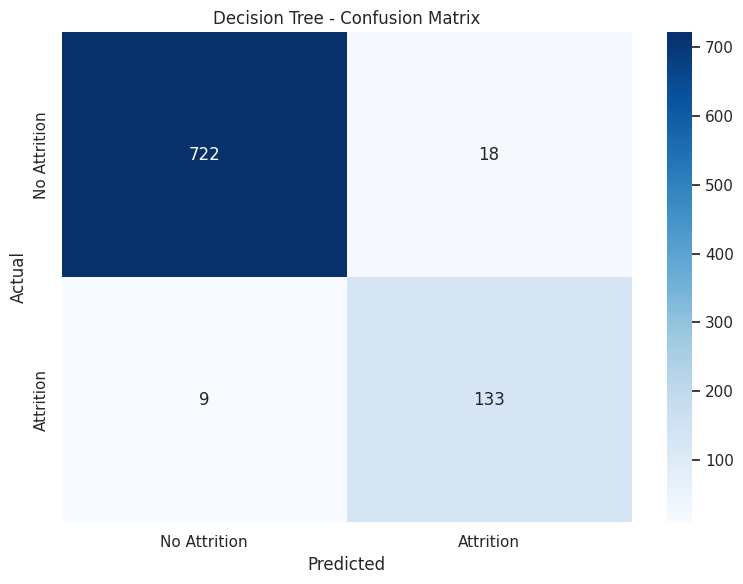

In [273]:
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')


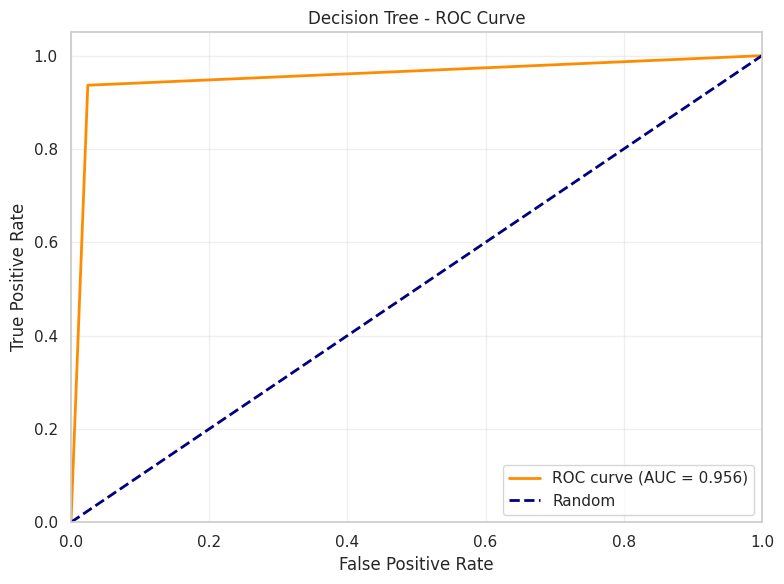

In [274]:
plot_roc_curve(y_test, y_pred_proba_dt, 'Decision Tree')


# Fith model Random forest

Random Forest (RF) is a supervised learning algorithm used for classification and regression. It is an **ensemble method** that builds multiple decision trees and aggregates their predictions. Given a dataset  
$\mathcal{D} = \{(x_1, y_1), ..., (x_n, y_n)\}$  
where  
$x_i \in \mathbb{R}^d$  
are feature vectors and  
$y_i$  
are labels, Random Forest aims to reduce overfitting and improve generalization by combining many decision trees trained on different subsets of data.

Construction

1. **Bootstrap sampling (Bagging):** For each tree, a subset of the training data is sampled **with replacement** to form a bootstrap dataset.  

2. **Random feature selection:** At each split in a tree, only a random subset of features is considered for the best split. This introduces diversity among trees.

3. **Tree growth:** Each tree is grown independently, typically **without pruning**, until a stopping criterion is met (e.g., maximum depth or minimum samples per leaf).


Prediction

* **Classification:** For a new point $x$, each tree predicts a class $\hat{y}_i$. The final prediction is obtained by **majority vote**:  
\[
\hat{y} = \text{mode}\{\hat{y}_1, \hat{y}_2, ..., \hat{y}_T\}
\]

* **Regression:** For a new point $x$, each tree predicts a value $\hat{y}_i$. The final prediction is the **average**:  
\[
\hat{y} = \frac{1}{T} \sum_{i=1}^T \hat{y}_i
\]

where $T$ is the total number of trees in the forest.

Notes

- Random Forest reduces **variance** compared to a single decision tree, making it more robust to overfitting.  
- Works well with both numerical and categorical features.  
- Handles missing values and maintains accuracy for large datasets.  
- Important hyperparameters include:  
  * Number of trees $T$  
  * Maximum tree depth  
  * Number of features to consider at each split  
  * Minimum samples per leaf


In [275]:
from sklearn.ensemble import RandomForestClassifier

# Initialize
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train 
rf_model.fit(X_train_rf_resampled, y_train_rf_resampled)

# Predict 
y_pred_rf = rf_model.predict(X_test_encoded)
y_pred_proba_rf = rf_model.predict_proba(X_test_encoded)[:, 1]

# Evaluate & Plot
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Performance:
Accuracy: 0.7607709750566893
Confusion Matrix:
 [[569 171]
 [ 40 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       740
           1       0.37      0.72      0.49       142

    accuracy                           0.76       882
   macro avg       0.65      0.74      0.67       882
weighted avg       0.84      0.76      0.79       882

